# Vector Double slit experiment

Here we analize what happens in the double slit experiment when the polarization of the two slits is the same or ortogonal. In the first case, fringes are obtained but this is not the case for the second experiment.   

### Creating an instance

In [15]:
from matplotlib import rcParams

rcParams['figure.dpi']=300

In [16]:
from diffractio import np, sp, plt
from diffractio import nm, um, mm, degrees

from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY

# for polarization components, diffractio also uses py_pol module.
from py_pol.jones_matrix import Jones_matrix


## Double Slit Experiment

In [17]:
x0 = np.linspace(-200 * um, 200 * um, 1024)
y0 = np.linspace(-200 * um, 200 * um, 1024)

wavelength = 0.6328 * um


### Equal polarization

In [18]:
j1 = Jones_matrix().diattenuator_perfect(azimuth=0)

In [19]:
t1 = Scalar_mask_XY(x0, y0, wavelength)
t1.square(r0=(-120, 0), size=(40, 160), angle=0)

t2 = Scalar_mask_XY(x0, y0, wavelength)
t2.square(r0=(120, 0), size=(40, 160), angle=0)

M1 = Vector_mask_XY(x0, y0, wavelength)
M1.polarizer_linear(azimuth=0 * degrees)
M1.scalar_to_vector_mask(t1, j1)

M2 = Vector_mask_XY(x0, y0, wavelength)
M2.polarizer_linear(azimuth=0 * degrees)
M2.scalar_to_vector_mask(t2, j1)

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave()

EM0 = Vector_source_XY(x0, y0, wavelength)
EM0.constant_polarization(u0, v=(1, 1))

400.0 (21, 21)


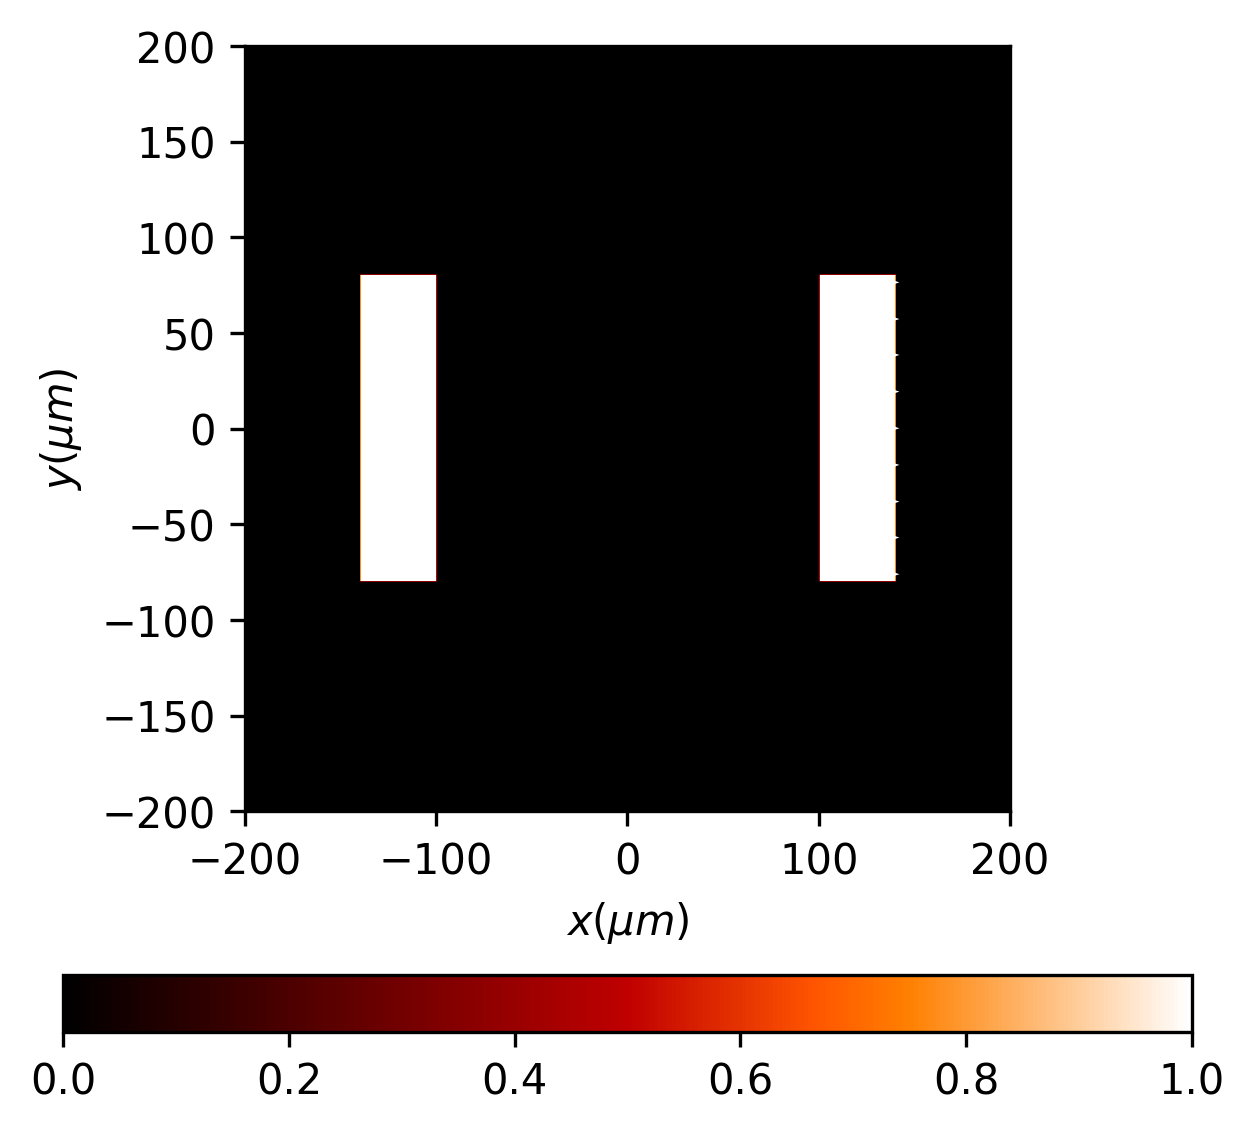

In [20]:
Et1 = EM0 * M1
Et2 = EM0 * M2

EM1 = Et1 + Et2
EM1.draw('ellipses', num_ellipses=(21, 21))


400.0 (21, 21)


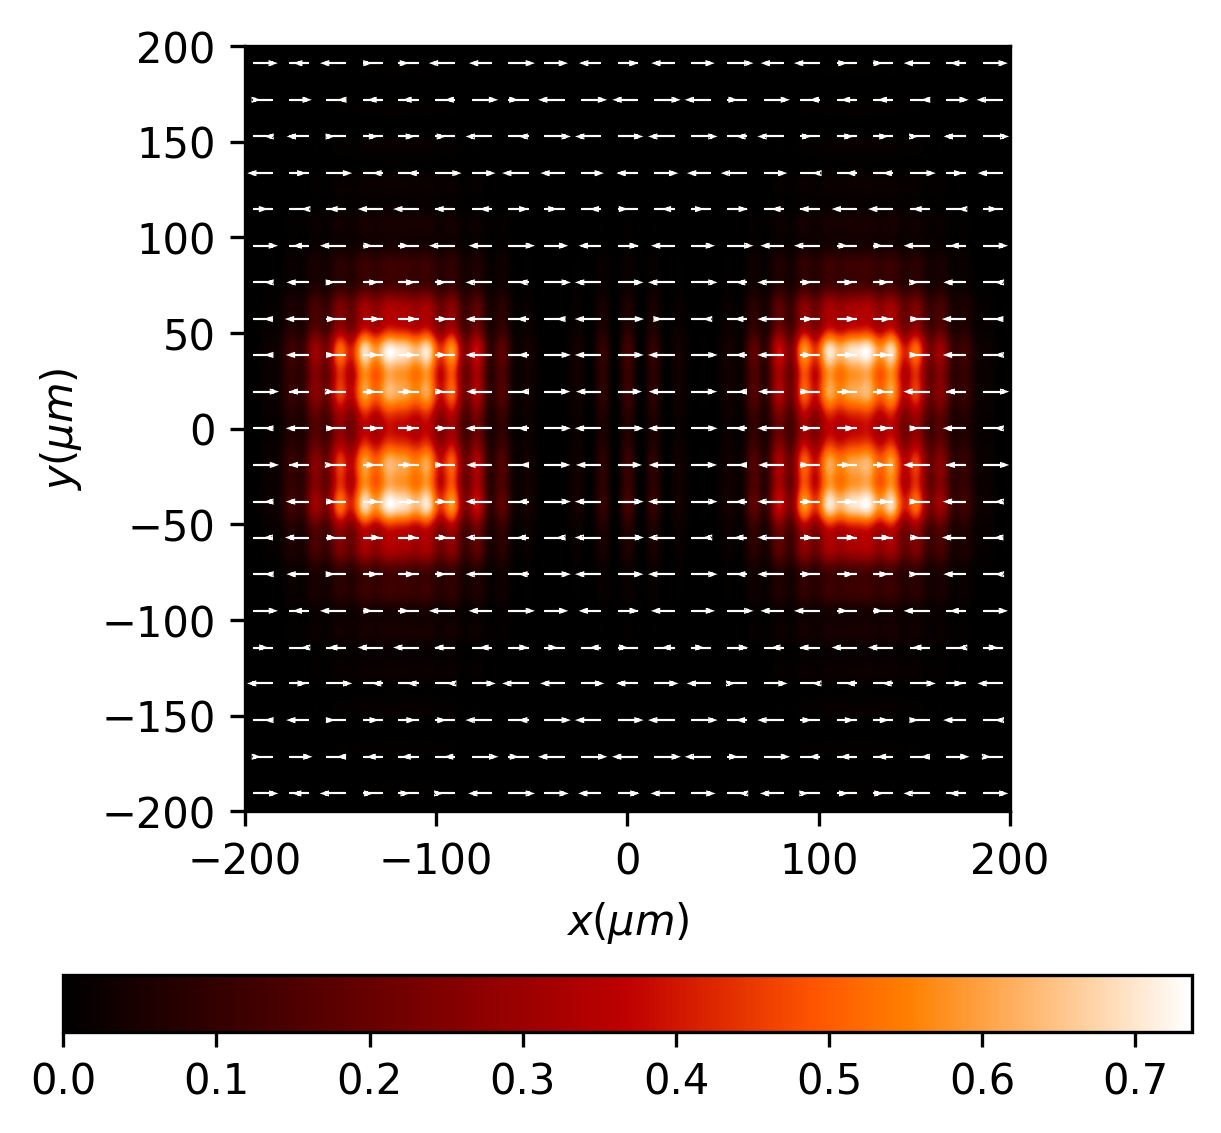

In [21]:
EM2 = EM1.VRS(z=5 * mm)
EM2.draw('ellipses', num_ellipses=(21, 21))


400.0 (21, 21)


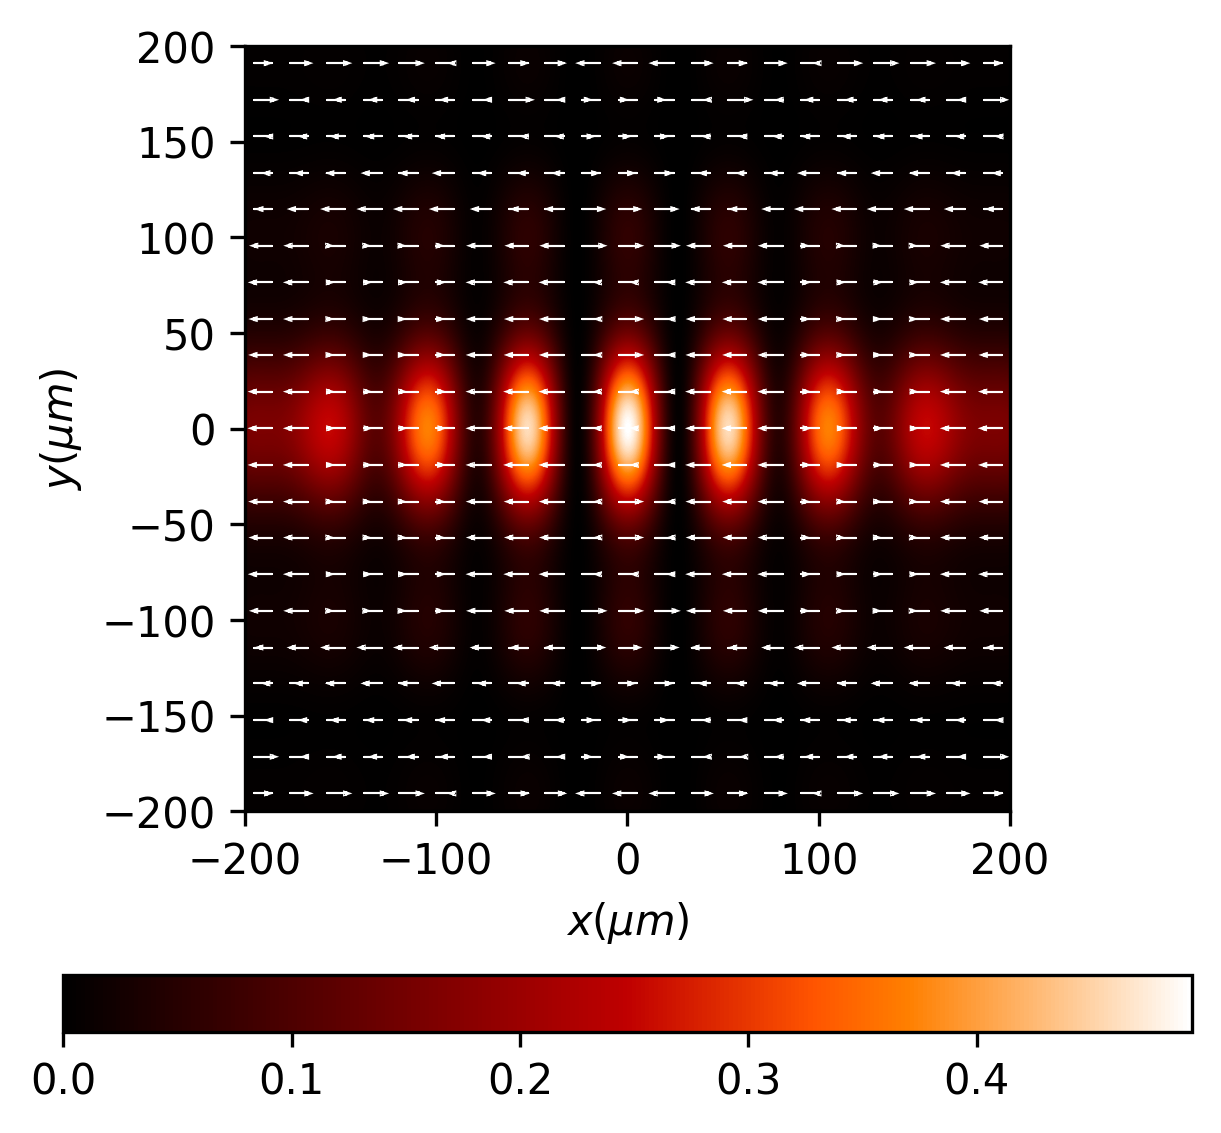

In [22]:
EM2 = EM1.VRS(z=20 * mm, )
EM2.draw('ellipses', num_ellipses=(21, 21))


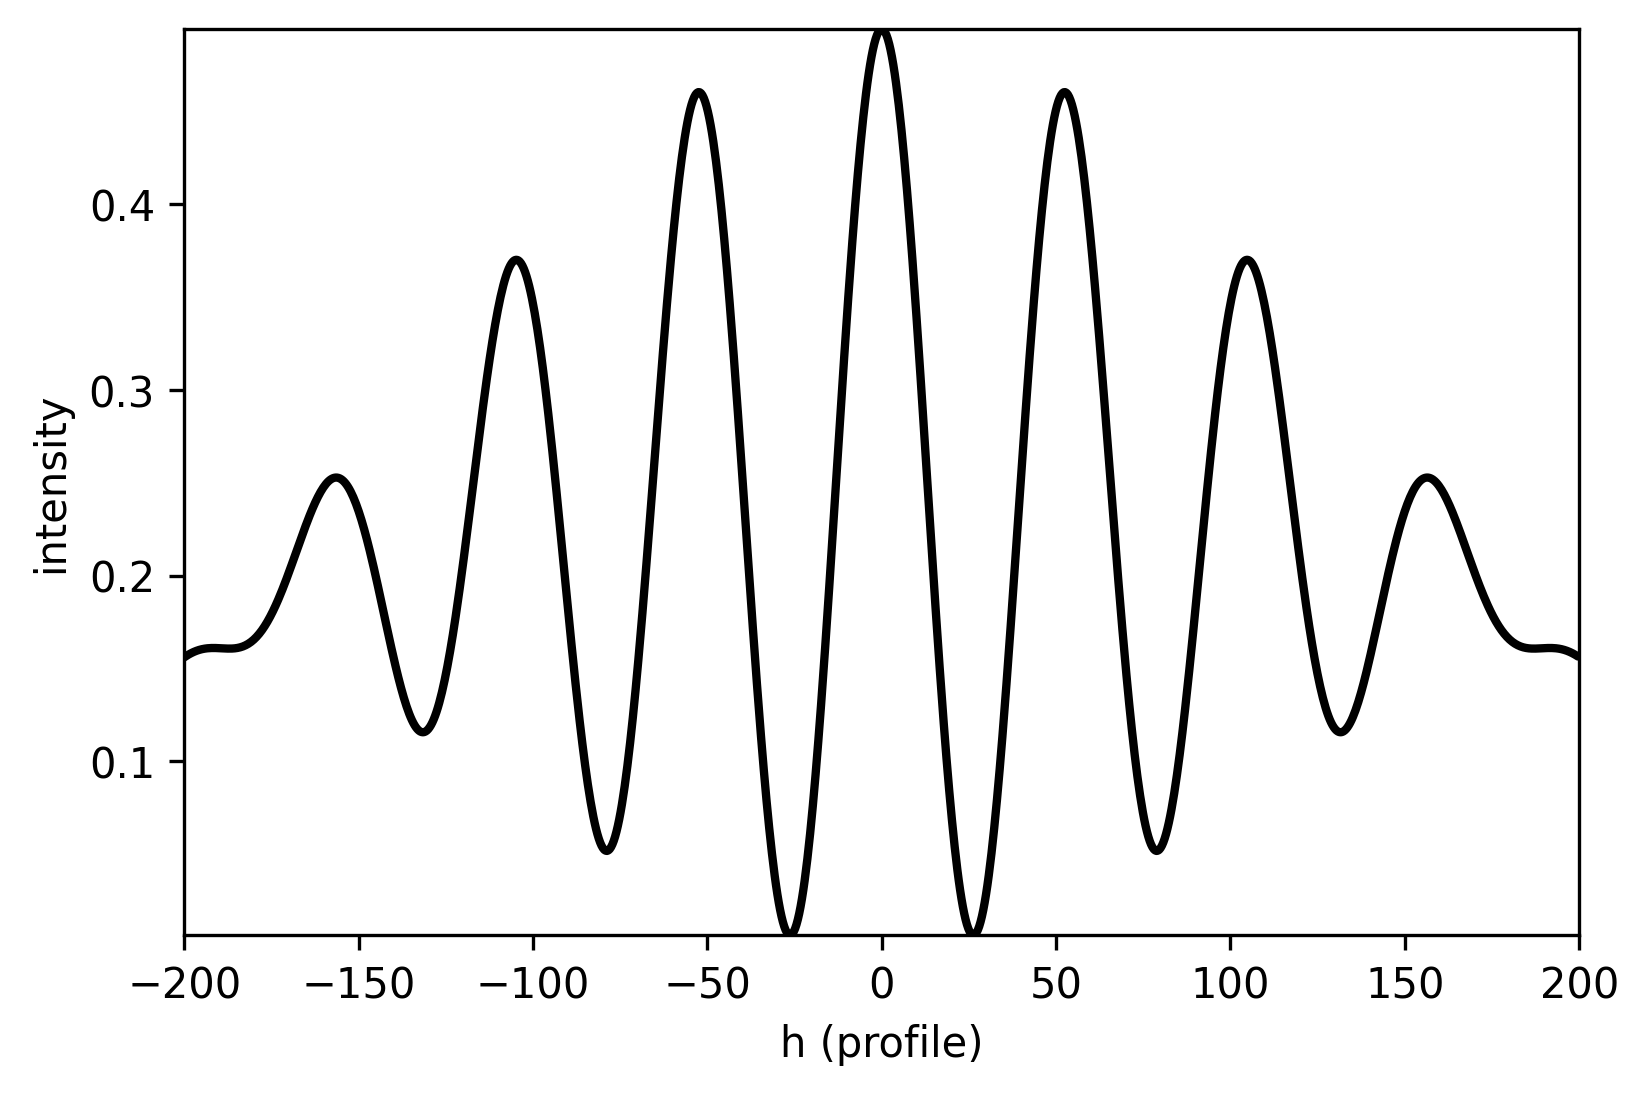

In [23]:
Ex, Ey, _ = EM2.get('fields', is_matrix=False)
Ex.draw_profile(point1=[Ex.x[0], 0], point2=[Ex.x[-1], 0])


In [ ]:
EM2 = EM1.VRS(z=25 * mm, amplification=(3, 1))
EM2.draw('ellipses', num_ellipses=(21, 11), amplification=0.75)


## Crossed polarization

In [25]:
j0 = Jones_matrix().diattenuator_perfect(azimuth=0*degrees)
j1 = Jones_matrix().diattenuator_perfect(azimuth=90*degrees)

In [26]:
M1 = Vector_mask_XY(x0, y0, wavelength)
M1.scalar_to_vector_mask(t1,j0)

M2 = Vector_mask_XY(x0, y0, wavelength)
M2.polarizer_linear(azimuth=90 * degrees)
M2.scalar_to_vector_mask(t2,j1)

u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave()

EM0.constant_polarization(u0, v=(1, 1))


400.0 (21, 21)


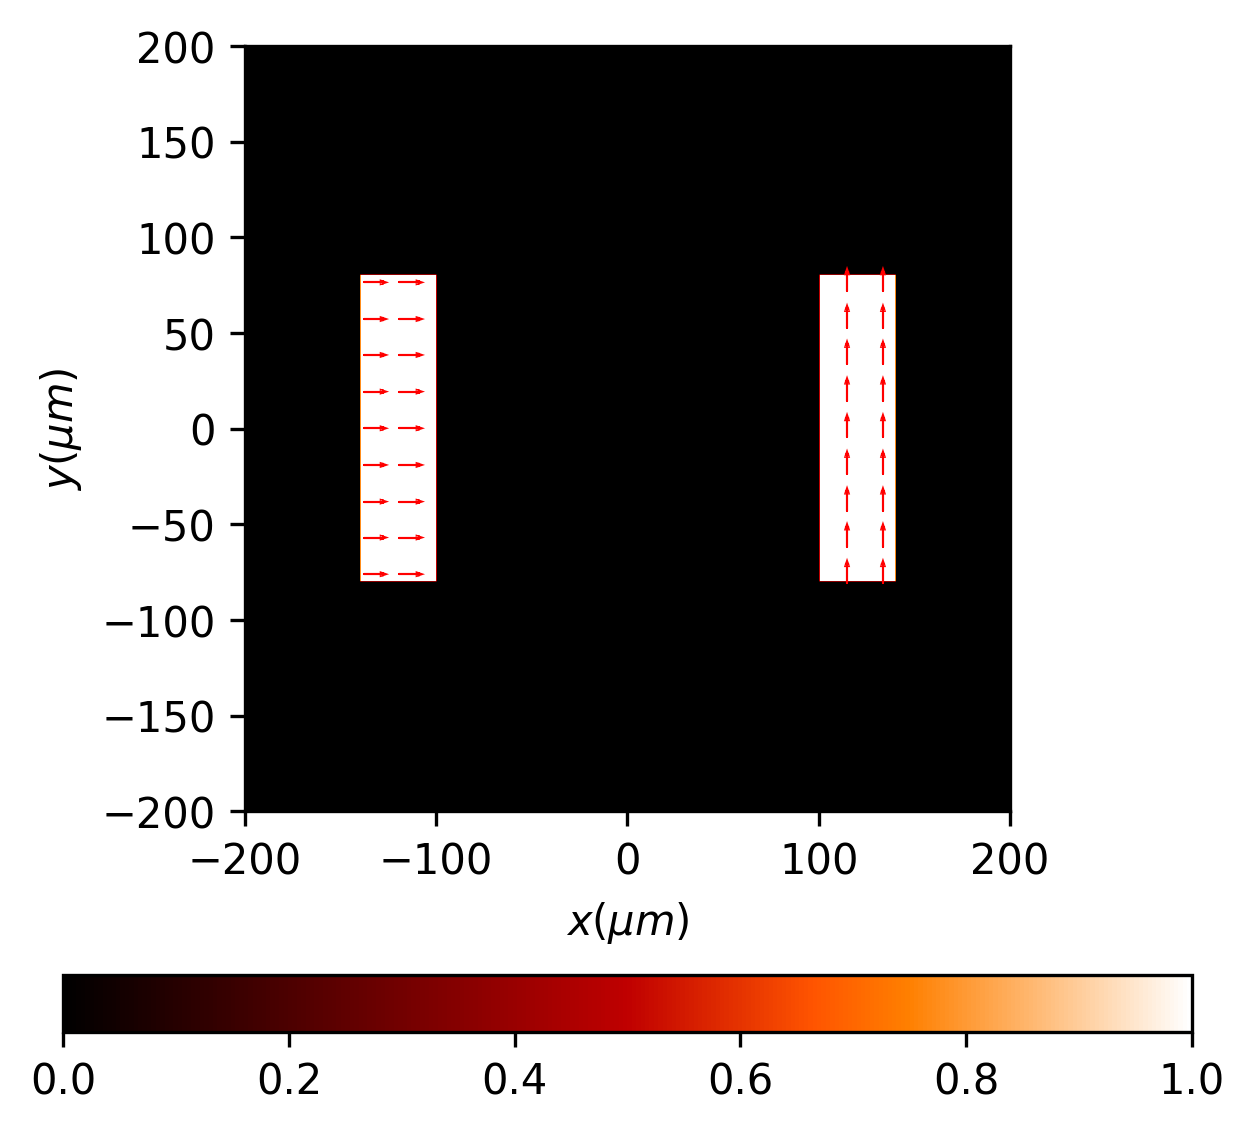

In [27]:
Et1 = EM0 * M1
Et2 = EM0 * M2

EM1 = Et1 + Et2
EM1.draw('ellipses', num_ellipses=(21, 21), color_line='r')


400.0 (15, 15)


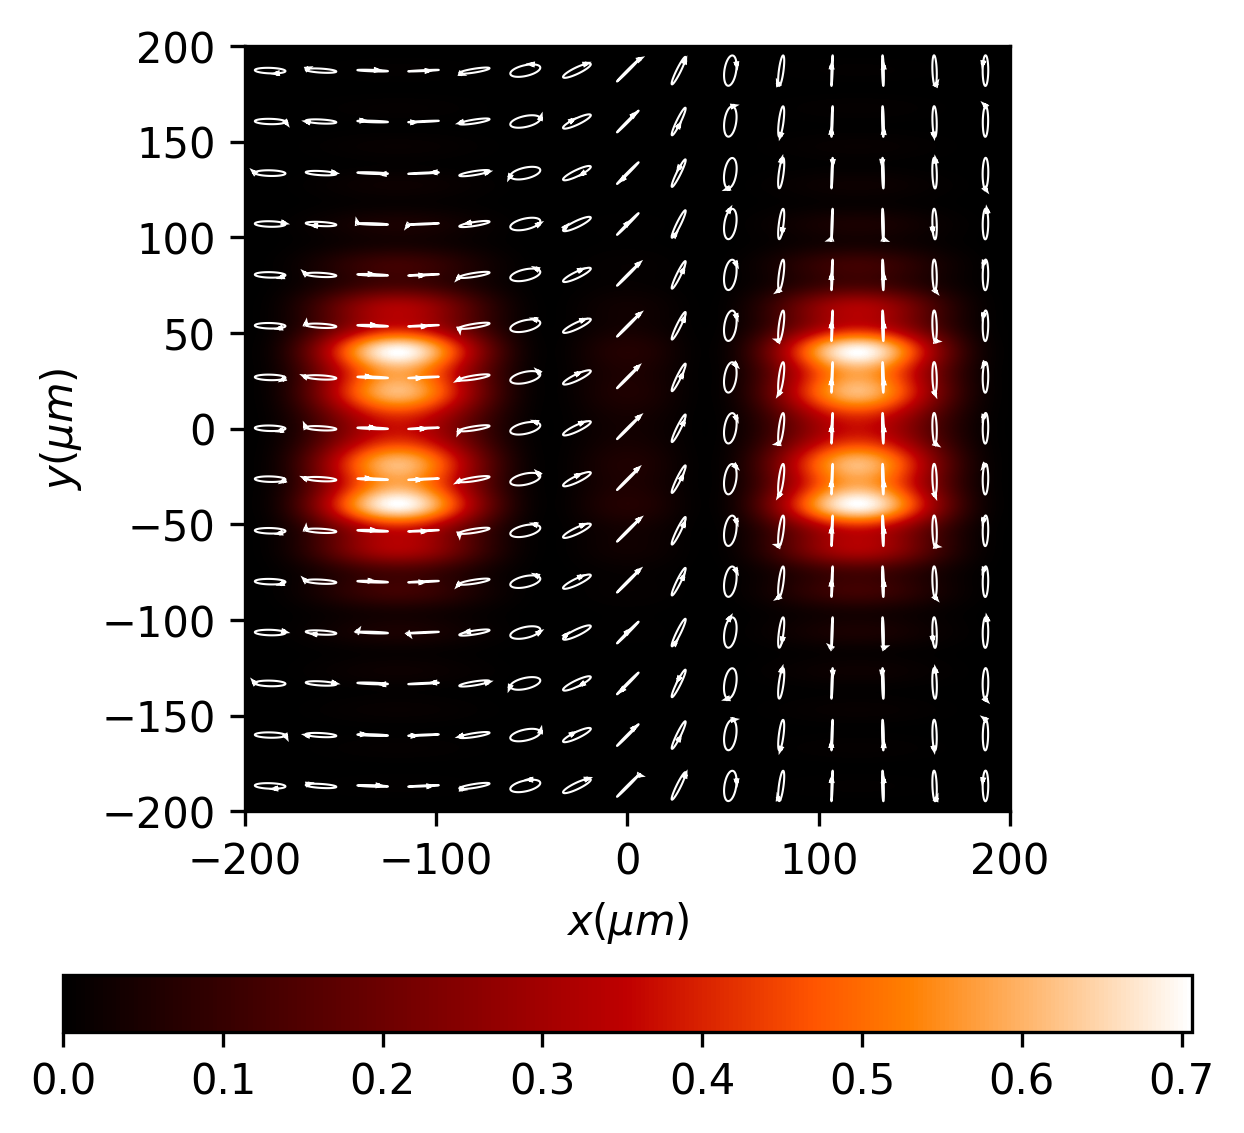

In [28]:
EM2 = EM1.VRS(z=5 * mm)
EM2.draw('ellipses', num_ellipses=(15, 15), amplification=0.6)


400.0 (15, 15)


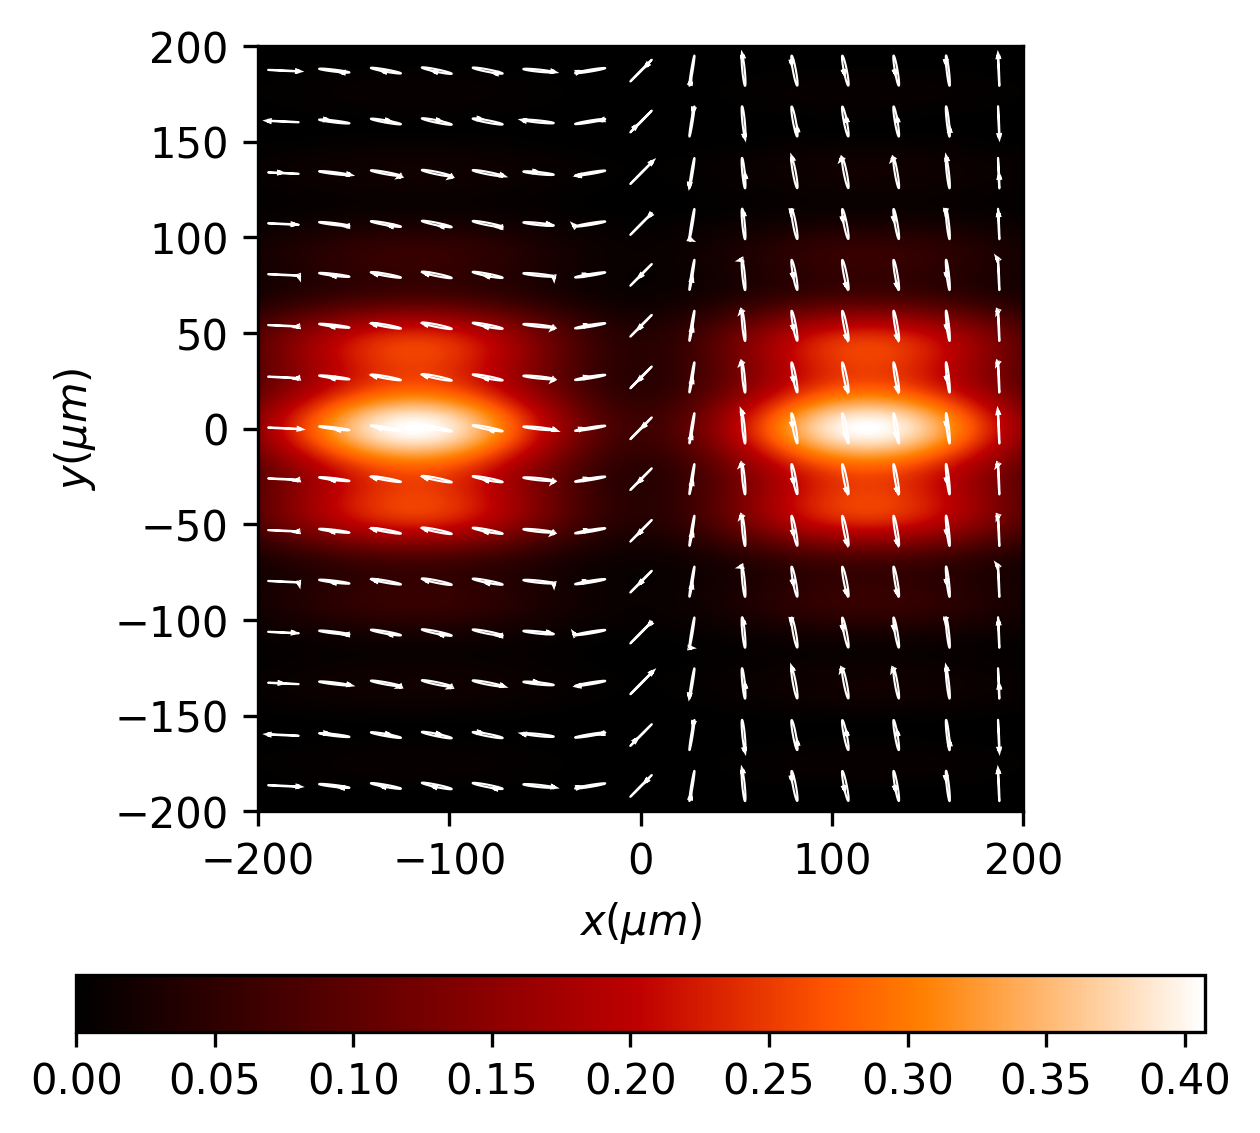

In [29]:
EM2 = EM1.VRS(z=10 * mm)
EM2.draw('ellipses', num_ellipses=(15, 15), amplification=0.6)


400.0 (15, 15)actor 92.75


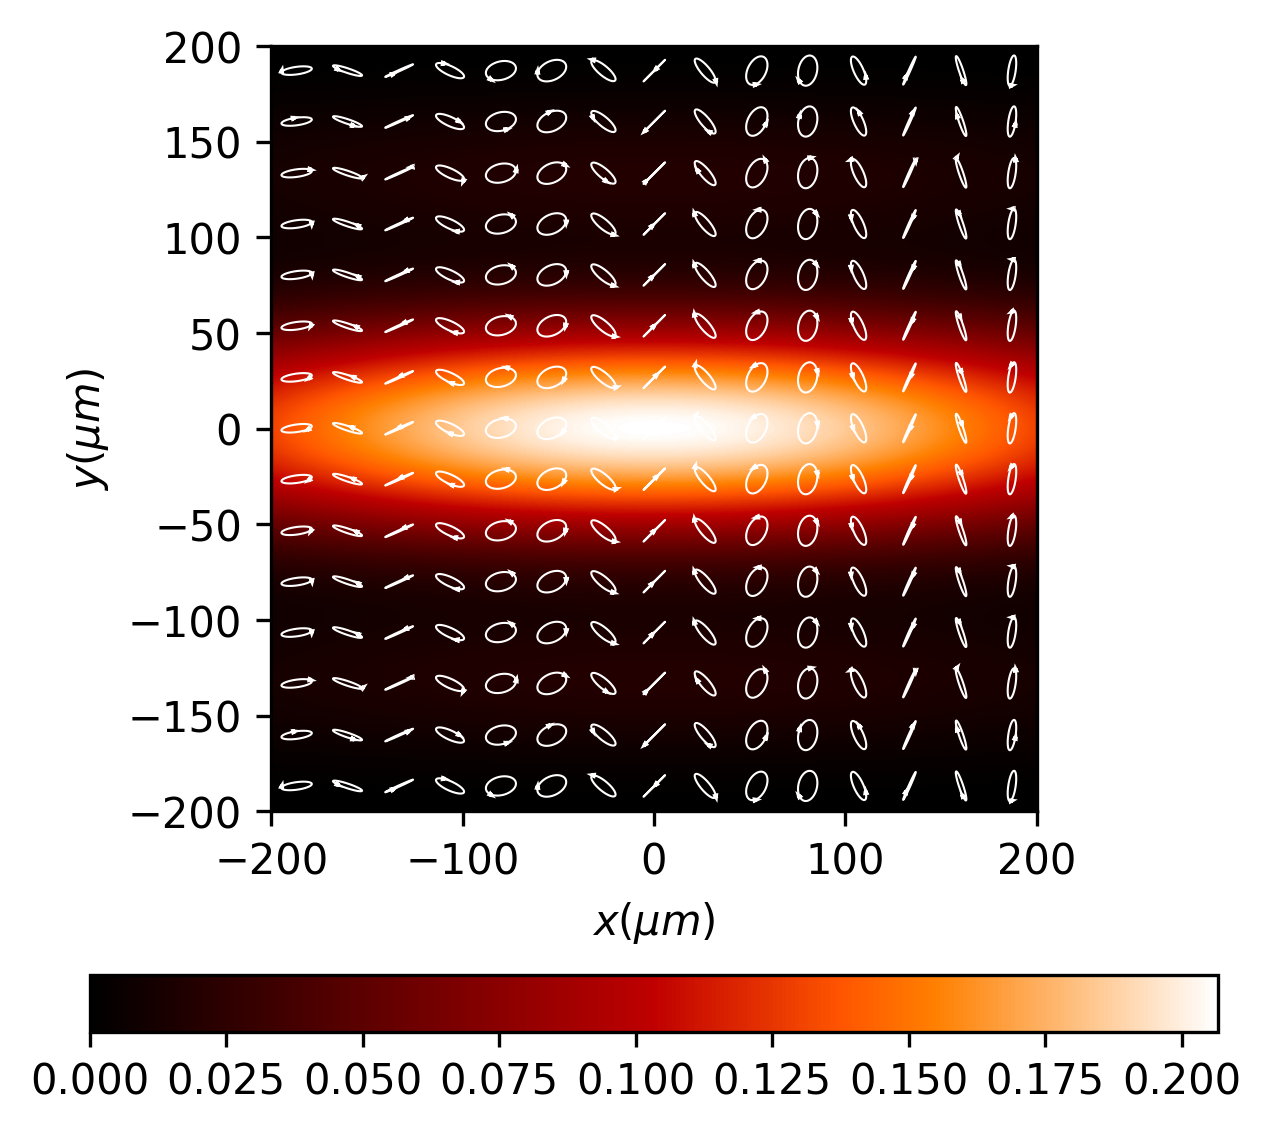

In [30]:
EM2 = EM1.VRS(z=25 * mm, amplification=(1, 1), verbose=True)
EM2.draw('ellipses', num_ellipses=(15, 15), amplification=.6)
